d:\workspace\dwm\jupyter_basic\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor(2.3047, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2259, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1220, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0629, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0453, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0447, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0370, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0467, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0203, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0321, device='cuda:0', grad_fn=<NllLossBackward0>)


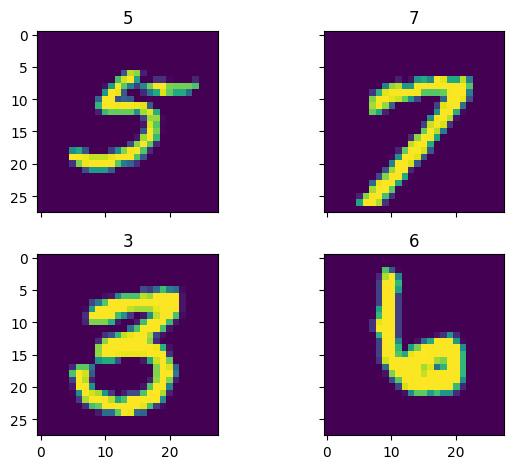

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader

batch_size = 256
learning_rate = 0.0002
num_epoch = 10

mnist_train = dset.MNIST("./data/", train=True, transform=transforms.ToTensor(),
                         target_transform=None, download=True)
mnist_test = dset.MNIST("./data/", train=False, transform=transforms.ToTensor(),
                        target_transform=None, download=True)

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size,
                                           shuffle=True, num_workers=0, drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size,
                                          shuffle=True, num_workers=0, drop_last=True)

sample_batch = next(iter(train_loader))
from utils.load_utils import display_from_batch
display_from_batch(sample_batch, 2, 2)            

from models.load_models import MyCNN
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MyCNN(batch_size=batch_size).to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)






loss_arr = []
for i in range(num_epoch):
    for j,[image, label] in enumerate(train_loader):
        x = image.to(device)
        y_ = label.to(device)

        optimizer.zero_grad()
        output = model(x)
        loss = loss_func(output, y_)
        loss.backward()
        optimizer.step()

        if j % 1000 == 0:
            print(loss)
            loss_arr.append(loss.cpu().detach().numpy())

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader

batch_size = 256
learning_rate = 0.0002
num_epoch = 10

from data.load_data import loader_data_mnist_torchvision
train_loader, test_loader = loader_data_mnist_torchvision()

print(type(train_loader))
print(train_loader.dataset[0][0].shape)

from models.load_models import MyCNN, MyMLP
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MyCNN(batch_size=batch_size).to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)



loss_arr = []
for i in range(num_epoch):
    for j,[image, label] in enumerate(train_loader):
        x = image.to(device)
        y_ = label.to(device)

        optimizer.zero_grad()
        output = model(x)
        loss = loss_func(output, y_)
        loss.backward()
        optimizer.step()

        if j % 1000 == 0:
            print(loss)
            loss_arr.append(loss.cpu().detach().numpy())

torch.utils.data.dataloader.DataLoader
torch.Size([1, 28, 28])
tensor(2.3031, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2144, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1268, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1151, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0557, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0833, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0569, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0774, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0514, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0220, device='cuda:0', grad_fn=<NllLossBackward>)


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader

batch_size = 256
learning_rate = 0.0002
num_epoch = 10

from sklearn.datasets import load_digits, fetch_openml

digits = fetch_openml('MNIST_784', version=1, data_home='./data/')
X_df = digits.data
Y_str = digits.target

X_t = torch.FloatTensor(X_df.values) / 255
X = torch.reshape(X_t, (-1, 1, 28, 28))
Y = torch.LongTensor([int(x) for x in Y_str])

n_samples = X.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
X_train = X[train_indices,:]
Y_train = Y[train_indices]
X_val = X[val_indices,:]
Y_val = Y[val_indices]

ds_train = TensorDataset(X_train, Y_train)
ds_val = TensorDataset(X_val, Y_val)
train_loader = DataLoader(ds_train, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(ds_val, batch_size=batch_size, shuffle=True, drop_last=True)

print(type(train_loader))
print(len(train_loader.dataset[0]))



from models.load_models import MyCNN
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MyCNN(batch_size=batch_size).to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)





loss_arr = []
for i in range(num_epoch):
    for j,[image, label] in enumerate(train_loader):
        x = image.to(device)
        y_ = label.to(device)

        optimizer.zero_grad()
        output = model(x)
        loss = loss_func(output, y_)
        loss.backward()
        optimizer.step()

        if j % 1000 == 0:
            print(loss)
            loss_arr.append(loss.cpu().detach().numpy())

torch.utils.data.dataloader.DataLoader
2
tensor(2.3089, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1788, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1096, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0749, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0509, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0398, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0441, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0385, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0242, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0702, device='cuda:0', grad_fn=<NllLossBackward>)


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader

batch_size = 256
learning_rate = 0.0002
num_epoch = 10

mnist_train = dset.MNIST("./data/", train=True, transform=transforms.ToTensor(),
                         target_transform=None, download=True)
mnist_test = dset.MNIST("./data/", train=False, transform=transforms.ToTensor(),
                        target_transform=None, download=True)

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size,
                                           shuffle=True, num_workers=0, drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size,
                                          shuffle=True, num_workers=0, drop_last=True)





from models.load_models import MyCNN
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MyCNN(batch_size=batch_size).to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)






from train.run_training import training_loop, validate
training_loop(10, optimizer, model, loss_func, train_loader, device=device)

tensor(2.3075, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2431, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1477, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1053, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0681, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0181, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0913, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0725, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0539, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0067, device='cuda:0', grad_fn=<NllLossBackward>)


[array(2.307535, dtype=float32),
 array(0.24312569, dtype=float32),
 array(0.14770298, dtype=float32),
 array(0.10528561, dtype=float32),
 array(0.06805909, dtype=float32),
 array(0.01813728, dtype=float32),
 array(0.09129666, dtype=float32),
 array(0.07253212, dtype=float32),
 array(0.05394066, dtype=float32),
 array(0.0067056, dtype=float32)]

In [7]:
import collections
all_acc_dict = collections.OrderedDict()
all_acc_dict["mycnn"] = validate(model, train_loader, test_loader, device=device)

Accuracy train: 0.99
Accuracy val: 0.99


In [8]:
print(all_acc_dict)

OrderedDict([('mycnn', {'train': 0.9872629540598291, 'val': 0.9873798076923077})])


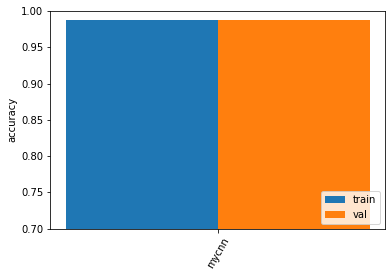

In [9]:
import matplotlib.pyplot as plt
import numpy as np
trn_acc = [v['train'] for k, v in all_acc_dict.items()]
val_acc = [v['val'] for k, v in all_acc_dict.items()]

width = 0.3
plt.bar(np.arange(len(trn_acc)), trn_acc, width=width, label='train')
plt.bar(np.arange(len(val_acc))+ width, val_acc, width=width, label='val')
plt.xticks(np.arange(len(val_acc))+ width/2, list(all_acc_dict.keys()),
           rotation=60)
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.ylim(0.7, 1)
plt.savefig('./fig/accuracy_comparison.png', bbox_inches='tight')
plt.show()
